<a href="https://colab.research.google.com/github/MadhavanTR/AStar/blob/master/trial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy import signal
np.random.seed(1992)
NumSteps = 201
TimeScale = np.linspace(0,10,NumSteps)
DeltaSim = np.diff(TimeScale)[0]
SigmaInput = 1
SigmaNoise = 0.5
F = np.array([[1,0,DeltaSim,0],[0,1,0,DeltaSim],[0,0,1,0],[0,0,0,1]])
Q = SigmaInput**2 * np.array([[DeltaSim**3/3,0,DeltaSim**2/2,0],
[0,DeltaSim**3/3,0,DeltaSim**2/2],
[DeltaSim**2/2,0,DeltaSim,0],
[0,DeltaSim**2/2,0,DeltaSim]])
H = np.array([[1,0,0,0],[0,1,0,0]])
R = SigmaNoise**2 * np.identity(2)
State = np.zeros((4,NumSteps))
NoisyMeasurements = np.zeros((2,NumSteps))
for t in np.arange(1,NumSteps):
  ProcessNoise = np.squeeze(np.matmul(np.linalg.cholesky(Q),np.random.randn(4,1)))
  State[:,t] = np.matmul(F,State[:,t-1]) + ProcessNoise
  MeasurementNoise = SigmaNoise * np.squeeze(np.random.randn(2))
  NoisyMeasurements[:,t] = np.matmul(H,State[:,t]) + MeasurementNoise
StateX1 = State[0,:]
StateX2 = State[1,:]
DownSampling=2
NoisyMeasurements = NoisyMeasurements[:,::DownSampling]
MeasurementY1 = NoisyMeasurements[0,:]
MeasurementY2 = NoisyMeasurements[1,:]

Text(0, 0.5, 'x_2 coordinate')

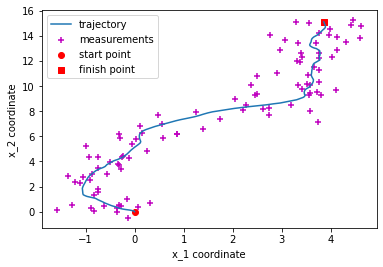

In [12]:
import matplotlib.pyplot as plt
# plt.plot(TimeScale, StateX1)
# # np.shape(TimeScale)
# plt.plot(TimeScale, StateX2)
plt.plot(StateX1, StateX2, label='trajectory')
# np.shape(NoisyMeasurements)
plt.scatter(NoisyMeasurements[0, :], NoisyMeasurements[1, :], marker='+', color='m', label='measurements')
plt.scatter(StateX1[0], StateX2[0], color='r', marker='o', label='start point')
plt.scatter(StateX1[-1], StateX2[-1], color='r', marker='s', label='finish point')
plt.legend(loc='best', fancybox=True)
plt.xlabel(xlabel = "x_1 coordinate")
plt.ylabel(ylabel = "x_2 coordinate")

In [9]:
np.shape(StateX1)

(201,)